                                  Question2

In [1]:
import os
import re
import pandas as pd
import numpy as np
import nltk
import random
from nltk.corpus import movie_reviews
from nltk.classify.scikitlearn import SklearnClassifier
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix

In [2]:
t1 = open("/Users/user/Desktop/CUTE5/GNQ_Data/m1.txt","r",encoding="latin")

In [3]:
m1=t1.readlines()

In [4]:
m1

["With nearly 80 years of experience making animated feature films, Disney has developed a reputation for making thoroughly enjoyable family fare, so saying they've created another such film isn\x92t anything particularly noteworthy. It\x92s what we\x92ve come to expect. While best known for its princess-led musicals, Disney animation has been on a roll of late with movies like the Academy Award-winning Big Hero 6 and the underrated Wreck-It Ralph. However, Zootopia isn\x92t simply another fun Disney animated movie. It\x92s one of the greatest animated movies the Disney company has ever produced.\n",
 '\n',
 'In the world of Zootopia, all mammals have evolved into intelligent bipedal creatures. Judy Hopps (Ginnifer Goodwin) is a bunny who has always wanted to be a police officer. As this is a job normally held by large animals, nobody gives her much of a chance, but she successfully completes police academy training and is assigned to a precinct in the heart of Zootopia, the city where

In [5]:
t2 = open("/Users/user/Desktop/CUTE5/GNQ_Data/m2.txt","r",encoding="latin")
t3 = open("/Users/user/Desktop/CUTE5/GNQ_Data/m3.txt","r",encoding="latin")

t4 = open("/Users/user/Desktop/CUTE5/GNQ_Data/m4.txt","r",encoding="latin")

t5 = open("/Users/user/Desktop/CUTE5/GNQ_Data/m5.txt","r",encoding="latin")

t6 = open("/Users/user/Desktop/CUTE5/GNQ_Data/m6.txt","r",encoding="latin")

t7 = open("/Users/user/Desktop/CUTE5/GNQ_Data/m7.txt","r",encoding="latin")

t8 = open("/Users/user/Desktop/CUTE5/GNQ_Data/m8.txt","r",encoding="latin")




In [6]:
m2=t2.readlines()
m3=t3.readlines()
m4=t4.readlines()
m5=t5.readlines()
m6=t6.readlines()
m7=t7.readlines()
m8=t8.readlines()

In [7]:
data={'movie_reiview':[m1,m2,m3,m4,m5,m6,m7,m8]}

In [8]:
data=pd.DataFrame(data)   #reading dataframe

In [9]:
data.head()

,movie_reiview
0,[With nearly 80 years of experience making ani...
1,[Inside this entertaining Disney movie is a re...
2,[One of the reasons Frozen has become as popul...
3,[I still dont know what this movie is about be...
4,[Saw the movie yesterday it was good. Full of ...


# Data preprocessing

In [10]:
for i in range(len(data['movie_reiview'])):
    data['movie_reiview'][i]=' '.join(data['movie_reiview'][i])

In [11]:
data.head()

,movie_reiview
0,With nearly 80 years of experience making anim...
1,Inside this entertaining Disney movie is a rea...
2,One of the reasons Frozen has become as popula...
3,I still dont know what this movie is about bes...
4,Saw the movie yesterday it was good. Full of E...


In [12]:
#Replacing all the characters other than Alphabets with space

In [13]:
for i in range(len(data['movie_reiview'])):
    data['movie_reiview'][i]=re.sub('[^A-Za-z]',' ',data['movie_reiview'][i])  
    data['movie_reiview'][i]=re.sub('\s+',' ',data['movie_reiview'][i]) #Also replacing more than one space with single space

In [14]:
data.head()

,movie_reiview
0,With nearly years of experience making animate...
1,Inside this entertaining Disney movie is a rea...
2,One of the reasons Frozen has become as popula...
3,I still dont know what this movie is about bes...
4,Saw the movie yesterday it was good Full of Ea...


In [15]:
data['movie_reiview']=[token.lower() for token in data['movie_reiview']]
data['movie_reiview']

0    with nearly years of experience making animate...
1    inside this entertaining disney movie is a rea...
2    one of the reasons frozen has become as popula...
3    i still dont know what this movie is about bes...
4    saw the movie yesterday it was good full of ea...
5    toy story and inside out are sitting at and an...
6     what ever happened to pure escapism that ente...
7    the modern mammal metropolis of zootopia is a ...
Name: movie_reiview, dtype: object

In [16]:
for i in range(len(data['movie_reiview'])):
    data['movie_reiview'][i] = word_tokenize(data['movie_reiview'][i])   #word tokenising on movie reviews text 


In [17]:
tokens=data['movie_reiview'].tolist()      #creating a list that contains sublists of all movie reviews


In [18]:
print(tokens)

[['with', 'nearly', 'years', 'of', 'experience', 'making', 'animated', 'feature', 'films', 'disney', 'has', 'developed', 'a', 'reputation', 'for', 'making', 'thoroughly', 'enjoyable', 'family', 'fare', 'so', 'saying', 'they', 've', 'created', 'another', 'such', 'film', 'isn', 't', 'anything', 'particularly', 'noteworthy', 'it', 's', 'what', 'we', 've', 'come', 'to', 'expect', 'while', 'best', 'known', 'for', 'its', 'princess', 'led', 'musicals', 'disney', 'animation', 'has', 'been', 'on', 'a', 'roll', 'of', 'late', 'with', 'movies', 'like', 'the', 'academy', 'award', 'winning', 'big', 'hero', 'and', 'the', 'underrated', 'wreck', 'it', 'ralph', 'however', 'zootopia', 'isn', 't', 'simply', 'another', 'fun', 'disney', 'animated', 'movie', 'it', 's', 'one', 'of', 'the', 'greatest', 'animated', 'movies', 'the', 'disney', 'company', 'has', 'ever', 'produced', 'in', 'the', 'world', 'of', 'zootopia', 'all', 'mammals', 'have', 'evolved', 'into', 'intelligent', 'bipedal', 'creatures', 'judy', 'h

#reading positive and negative dictionaries

In [19]:
posDict=open("/Users/user/Desktop/CUTE5/GNQ_Data/Pos_Neg/words-dictionary/positive-words.txt","r",encoding="latin")
posDict=posDict.readlines()
negDict=open("/Users/user/Desktop/CUTE5/GNQ_Data/Pos_Neg/words-dictionary/negative-words.txt","r",encoding="latin")
negDict=negDict.readlines()
posDict
negDict   

[';;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;\n',
 '; \n',
 '; Opinion Lexicon: Negative\n',
 ';\n',
 '; This file contains a list of NEGATIVE opinion words (or sentiment words).\n',
 ';\n',
 '; This file and the papers can all be downloaded from \n',
 ';    http://www.cs.uic.edu/~liub/FBS/sentiment-analysis.html\n',
 ';\n',
 '; If you use this list, please cite one of the following two papers:\n',
 ';\n',
 ';   Minqing Hu and Bing Liu. "Mining and Summarizing Customer Reviews." \n',
 ';       Proceedings of the ACM SIGKDD International Conference on Knowledge \n',
 ';       Discovery and Data Mining (KDD-2004), Aug 22-25, 2004, Seattle, \n',
 ';       Washington, USA, \n',
 ';   Bing Liu, Minqing Hu and Junsheng Cheng. "Opinion Observer: Analyzing \n',
 ';       and Comparing Opinions on the Web." Proceedings of the 14th \n',
 ';       International World Wide Web conference (WWW-2005), May 10-14, \n',
 ';       2005, Chiba, Japan.\n',
 ';\n',
 '; No

In [20]:
posDict=posDict[35:]
negDict=negDict[35:]    # #there is some description given in both dictionaries upto 35 lines in text file which is not necessary
posDict

['a+\n',
 'abound\n',
 'abounds\n',
 'abundance\n',
 'abundant\n',
 'accessable\n',
 'accessible\n',
 'acclaim\n',
 'acclaimed\n',
 'acclamation\n',
 'accolade\n',
 'accolades\n',
 'accommodative\n',
 'accomodative\n',
 'accomplish\n',
 'accomplished\n',
 'accomplishment\n',
 'accomplishments\n',
 'accurate\n',
 'accurately\n',
 'achievable\n',
 'achievement\n',
 'achievements\n',
 'achievible\n',
 'acumen\n',
 'adaptable\n',
 'adaptive\n',
 'adequate\n',
 'adjustable\n',
 'admirable\n',
 'admirably\n',
 'admiration\n',
 'admire\n',
 'admirer\n',
 'admiring\n',
 'admiringly\n',
 'adorable\n',
 'adore\n',
 'adored\n',
 'adorer\n',
 'adoring\n',
 'adoringly\n',
 'adroit\n',
 'adroitly\n',
 'adulate\n',
 'adulation\n',
 'adulatory\n',
 'advanced\n',
 'advantage\n',
 'advantageous\n',
 'advantageously\n',
 'advantages\n',
 'adventuresome\n',
 'adventurous\n',
 'advocate\n',
 'advocated\n',
 'advocates\n',
 'affability\n',
 'affable\n',
 'affably\n',
 'affectation\n',
 'affection\n',
 'affe

In [21]:
for i in range(len(posDict)):      #removing \n observed in positive dictionary list
    posDict[i]=re.sub('[\n]', '',posDict[i])

In [22]:
posDict

['a+',
 'abound',
 'abounds',
 'abundance',
 'abundant',
 'accessable',
 'accessible',
 'acclaim',
 'acclaimed',
 'acclamation',
 'accolade',
 'accolades',
 'accommodative',
 'accomodative',
 'accomplish',
 'accomplished',
 'accomplishment',
 'accomplishments',
 'accurate',
 'accurately',
 'achievable',
 'achievement',
 'achievements',
 'achievible',
 'acumen',
 'adaptable',
 'adaptive',
 'adequate',
 'adjustable',
 'admirable',
 'admirably',
 'admiration',
 'admire',
 'admirer',
 'admiring',
 'admiringly',
 'adorable',
 'adore',
 'adored',
 'adorer',
 'adoring',
 'adoringly',
 'adroit',
 'adroitly',
 'adulate',
 'adulation',
 'adulatory',
 'advanced',
 'advantage',
 'advantageous',
 'advantageously',
 'advantages',
 'adventuresome',
 'adventurous',
 'advocate',
 'advocated',
 'advocates',
 'affability',
 'affable',
 'affably',
 'affectation',
 'affection',
 'affectionate',
 'affinity',
 'affirm',
 'affirmation',
 'affirmative',
 'affluence',
 'affluent',
 'afford',
 'affordable',
 'af

In [23]:
for i in range(len(negDict)):          #removing \n in negative dictionary list
          negDict[i]=re.sub('[\n]', '',negDict[i])

In [24]:
negDict

['2-faced',
 '2-faces',
 'abnormal',
 'abolish',
 'abominable',
 'abominably',
 'abominate',
 'abomination',
 'abort',
 'aborted',
 'aborts',
 'abrade',
 'abrasive',
 'abrupt',
 'abruptly',
 'abscond',
 'absence',
 'absent-minded',
 'absentee',
 'absurd',
 'absurdity',
 'absurdly',
 'absurdness',
 'abuse',
 'abused',
 'abuses',
 'abusive',
 'abysmal',
 'abysmally',
 'abyss',
 'accidental',
 'accost',
 'accursed',
 'accusation',
 'accusations',
 'accuse',
 'accuses',
 'accusing',
 'accusingly',
 'acerbate',
 'acerbic',
 'acerbically',
 'ache',
 'ached',
 'aches',
 'achey',
 'aching',
 'acrid',
 'acridly',
 'acridness',
 'acrimonious',
 'acrimoniously',
 'acrimony',
 'adamant',
 'adamantly',
 'addict',
 'addicted',
 'addicting',
 'addicts',
 'admonish',
 'admonisher',
 'admonishingly',
 'admonishment',
 'admonition',
 'adulterate',
 'adulterated',
 'adulteration',
 'adulterier',
 'adversarial',
 'adversary',
 'adverse',
 'adversity',
 'afflict',
 'affliction',
 'afflictive',
 'affront',


In [25]:
array_length = len(tokens)    
print(array_length)

8


In [26]:
d=[]
for i in range(array_length):
    def intersection(posDict, tokens):
            poswords = [x for x in posDict if x in tokens[i]] 
            return poswords
    print(intersection(posDict, tokens))
    d.append((intersection(posDict, tokens)))   

#appending all common words in tokens and positive dictionary into list 'd' 

['award', 'best', 'enjoyable', 'fun', 'good', 'greatest', 'harmony', 'helping', 'hero', 'intelligent', 'leads', 'led', 'like', 'noteworthy', 'reputation', 'smarter', 'solid', 'successfully', 'trust', 'well', 'winning']
['entertaining', 'important', 'peaceful', 'pretty', 'well']
['amazing', 'available', 'charm', 'clear', 'enjoy', 'enough', 'exciting', 'fun', 'good', 'helped', 'honest', 'joy', 'luck', 'perfect', 'perfectly', 'polite', 'popular', 'romantic', 'spectacular', 'talents', 'top', 'well', 'willing', 'won', 'work']
['cute']
['better', 'good', 'loved']
['awards', 'impressive', 'win']
['blockbuster', 'entertains', 'good', 'important', 'progressive', 'pure', 'simplified']
['easy', 'fast', 'hero', 'like', 'modern', 'optimistic', 'rich', 'tough']


In [27]:
c=[]
for i in range(array_length):
    def intersection(negDict, tokens):
            poswords = [x for x in negDict if x in tokens[i]] 
            return poswords
    print(intersection(negDict, tokens))
    c.append((intersection(negDict, tokens)))

#appending all common words in tokens and negative dictionary into list 'c'

['crack', 'disadvantage', 'fear', 'flair', 'hustler', 'joke', 'wreck']
['bias', 'fear', 'prejudice', 'ripped']
['criticism', 'disappointed', 'frozen', 'humming', 'joke', 'twist']
['funny']
['badly', 'critics', 'marginally', 'wreck']
[]
['mindless']
['crack', 'frigid', 'mystery', 'scam', 'shrew', 'tangled', 'wreck']


In [28]:
d

[['award',
  'best',
  'enjoyable',
  'fun',
  'good',
  'greatest',
  'harmony',
  'helping',
  'hero',
  'intelligent',
  'leads',
  'led',
  'like',
  'noteworthy',
  'reputation',
  'smarter',
  'solid',
  'successfully',
  'trust',
  'well',
  'winning'],
 ['entertaining', 'important', 'peaceful', 'pretty', 'well'],
 ['amazing',
  'available',
  'charm',
  'clear',
  'enjoy',
  'enough',
  'exciting',
  'fun',
  'good',
  'helped',
  'honest',
  'joy',
  'luck',
  'perfect',
  'perfectly',
  'polite',
  'popular',
  'romantic',
  'spectacular',
  'talents',
  'top',
  'well',
  'willing',
  'won',
  'work'],
 ['cute'],
 ['better', 'good', 'loved'],
 ['awards', 'impressive', 'win'],
 ['blockbuster',
  'entertains',
  'good',
  'important',
  'progressive',
  'pure',
  'simplified'],
 ['easy', 'fast', 'hero', 'like', 'modern', 'optimistic', 'rich', 'tough']]

In [29]:
c

[['crack', 'disadvantage', 'fear', 'flair', 'hustler', 'joke', 'wreck'],
 ['bias', 'fear', 'prejudice', 'ripped'],
 ['criticism', 'disappointed', 'frozen', 'humming', 'joke', 'twist'],
 ['funny'],
 ['badly', 'critics', 'marginally', 'wreck'],
 [],
 ['mindless'],
 ['crack', 'frigid', 'mystery', 'scam', 'shrew', 'tangled', 'wreck']]

In [30]:
data['matched_Negwords'] = c     #creating new attribute of matched_Negwords and matched_positive words

In [31]:
data['matched_Poswords'] = d

In [32]:
data.head(9)

,movie_reiview,matched_Negwords,matched_Poswords
0,"[with, nearly, years, of, experience, making, ...","[crack, disadvantage, fear, flair, hustler, jo...","[award, best, enjoyable, fun, good, greatest, ..."
1,"[inside, this, entertaining, disney, movie, is...","[bias, fear, prejudice, ripped]","[entertaining, important, peaceful, pretty, well]"
2,"[one, of, the, reasons, frozen, has, become, a...","[criticism, disappointed, frozen, humming, jok...","[amazing, available, charm, clear, enjoy, enou..."
3,"[i, still, dont, know, what, this, movie, is, ...",[funny],[cute]
4,"[saw, the, movie, yesterday, it, was, good, fu...","[badly, critics, marginally, wreck]","[better, good, loved]"
5,"[toy, story, and, inside, out, are, sitting, a...",[],"[awards, impressive, win]"
6,"[what, ever, happened, to, pure, escapism, tha...",[mindless],"[blockbuster, entertains, good, important, pro..."
7,"[the, modern, mammal, metropolis, of, zootopia...","[crack, frigid, mystery, scam, shrew, tangled,...","[easy, fast, hero, like, modern, optimistic, r..."


In [33]:
#lapply(posDict, function(x) pos[pmatch(x, tokens)])

# Sentiment score Analysis

In [34]:
data['Neg_Length'] = data['matched_Negwords'].str.len()
# creating new attribute that gives the length of common negative words

In [35]:
data['Pos_Length'] = data['matched_Poswords'].str.len()

In [36]:
data.head()

,movie_reiview,matched_Negwords,matched_Poswords,Neg_Length,Pos_Length
0,"[with, nearly, years, of, experience, making, ...","[crack, disadvantage, fear, flair, hustler, jo...","[award, best, enjoyable, fun, good, greatest, ...",7,21
1,"[inside, this, entertaining, disney, movie, is...","[bias, fear, prejudice, ripped]","[entertaining, important, peaceful, pretty, well]",4,5
2,"[one, of, the, reasons, frozen, has, become, a...","[criticism, disappointed, frozen, humming, jok...","[amazing, available, charm, clear, enjoy, enou...",6,25
3,"[i, still, dont, know, what, this, movie, is, ...",[funny],[cute],1,1
4,"[saw, the, movie, yesterday, it, was, good, fu...","[badly, critics, marginally, wreck]","[better, good, loved]",4,3


In [37]:
data['difference']=data['Pos_Length'] - data['Neg_Length']

In [38]:
data['sentiment_score']=np.where((data['Pos_Length'] - data['Neg_Length'])>=0, 1, 0)
#creating new attribute to find the sentiment score,score is 1 if there are more no of positive words sentiment score is 1 else 0

In [39]:
data.head()

,movie_reiview,matched_Negwords,matched_Poswords,Neg_Length,Pos_Length,difference,sentiment_score
0,"[with, nearly, years, of, experience, making, ...","[crack, disadvantage, fear, flair, hustler, jo...","[award, best, enjoyable, fun, good, greatest, ...",7,21,14,1
1,"[inside, this, entertaining, disney, movie, is...","[bias, fear, prejudice, ripped]","[entertaining, important, peaceful, pretty, well]",4,5,1,1
2,"[one, of, the, reasons, frozen, has, become, a...","[criticism, disappointed, frozen, humming, jok...","[amazing, available, charm, clear, enjoy, enou...",6,25,19,1
3,"[i, still, dont, know, what, this, movie, is, ...",[funny],[cute],1,1,0,1
4,"[saw, the, movie, yesterday, it, was, good, fu...","[badly, critics, marginally, wreck]","[better, good, loved]",4,3,-1,0


In [40]:
for i in range(len(data['movie_reiview'])):
   data['movie_reiview'][i]=' '.join(data['movie_reiview'][i])

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [41]:
for i in range(len(data['movie_reiview'])):
   data['matched_Negwords'][i]=' '.join(data['matched_Negwords'][i])
for i in range(len(data['movie_reiview'])):
   data['matched_Poswords'][i]=' '.join(data['matched_Poswords'][i])

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [42]:
data.head(9)

,movie_reiview,matched_Negwords,matched_Poswords,Neg_Length,Pos_Length,difference,sentiment_score
0,with nearly years of experience making animate...,crack disadvantage fear flair hustler joke wreck,award best enjoyable fun good greatest harmony...,7,21,14,1
1,inside this entertaining disney movie is a rea...,bias fear prejudice ripped,entertaining important peaceful pretty well,4,5,1,1
2,one of the reasons frozen has become as popula...,criticism disappointed frozen humming joke twist,amazing available charm clear enjoy enough exc...,6,25,19,1
3,i still dont know what this movie is about bes...,funny,cute,1,1,0,1
4,saw the movie yesterday it was good full of ea...,badly critics marginally wreck,better good loved,4,3,-1,0
5,toy story and inside out are sitting at and an...,,awards impressive win,0,3,3,1
6,what ever happened to pure escapism that enter...,mindless,blockbuster entertains good important progress...,1,7,6,1
7,the modern mammal metropolis of zootopia is a ...,crack frigid mystery scam shrew tangled wreck,easy fast hero like modern optimistic rich tough,7,8,1,1


In [43]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test=train_test_split(data['movie_reiview'],data['sentiment_score'],test_size=0.3,random_state=1234)

In [44]:
X_train

0    with nearly years of experience making animate...
4    saw the movie yesterday it was good full of ea...
5    toy story and inside out are sitting at and an...
3    i still dont know what this movie is about bes...
7    the modern mammal metropolis of zootopia is a ...
Name: movie_reiview, dtype: object

In [45]:
X_test.shape

(3,)

# count vectoriser

In [46]:
cv=CountVectorizer(lowercase=True,
                   strip_accents='unicode',decode_error='ignore')

tdm_train = cv.fit_transform(X_train)
Mat = tdm_train.todense()
Mat
Mat.shape

(5, 329)

In [47]:
tdm_test = cv.transform(X_test)
Mat_test = tdm_test.todense()
Mat_test.shape

(3, 329)

In [48]:
tdm_train

<5x329 sparse matrix of type '<class 'numpy.int64'>'
	with 428 stored elements in Compressed Sparse Row format>

# Logistion Regression Model

In [49]:
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings("ignore") #just to ignore any warnings

#Training the model
logreg = LogisticRegression()
lr_clf = logreg.fit(tdm_train, y_train)


#Predicting on train data
train_pred = lr_clf.predict(tdm_train)


#Predicting on test data
test_pred=lr_clf.predict(tdm_test)



# Confusion matrix of train, test 

In [50]:
print("Train_Confusion Matrix: \n", confusion_matrix(y_train,train_pred))
print("Test_Confusion Matrix: \n", confusion_matrix(y_test,test_pred))

Train_Confusion Matrix: 
 [[1 0]
 [0 4]]
Test_Confusion Matrix: 
 [[3]]


# Accuracy, Recall and Precision 

In [51]:
from sklearn.metrics import recall_score, precision_score, accuracy_score

acc = accuracy_score(y_train, train_pred)
rec = recall_score(y_train, train_pred, average='binary')
prec = precision_score(y_train, train_pred, average='binary')

print("Results of logistic regression on train data:","\nAccuracy:",acc, "\nRecall:",rec, "\nPrecision:",prec)

Results of logistic regression on train data: 
Accuracy: 1.0 
Recall: 1.0 
Precision: 1.0


In [52]:
acc = accuracy_score(y_test, test_pred)
rec = recall_score(y_test, test_pred, average='binary')
prec = precision_score(y_test, test_pred, average='binary')

print("Results of logistic regression on test data:","\nAccuracy:",acc, "\nRecall:",rec, "\nPrecision:",prec)

Results of logistic regression on test data: 
Accuracy: 1.0 
Recall: 1.0 
Precision: 1.0


# Naive Bias classification model

In [53]:
from sklearn.naive_bayes import MultinomialNB
nb_clf = MultinomialNB().fit(tdm_train, y_train) #nb_clf is the classifier
pred_train = nb_clf.predict(tdm_train) #get predictions on train data

from sklearn.metrics import confusion_matrix
prediction=confusion_matrix(y_train, pred_train) #get confusion matrix for train predictions

# Evaluation metrics

In [54]:
print("Train_Confusion Matrix:\n",prediction,"\n")

from sklearn.metrics import recall_score, precision_score, accuracy_score

acc = accuracy_score(y_train, pred_train)
rec = recall_score(y_train, pred_train,average='binary')
prec = precision_score(y_train, pred_train,average='binary')

print("Results of Naive Bayes on train data:","\nAccuracy:",acc, "\nRecall:",rec, "\nPrecision:",prec)

Train_Confusion Matrix:
 [[1 0]
 [0 4]] 

Results of Naive Bayes on train data: 
Accuracy: 1.0 
Recall: 1.0 
Precision: 1.0


In [55]:
pred = nb_clf.predict(tdm_test) #predict on test data
prediction = confusion_matrix(y_test,pred) ##get confusion matrix for test predictions

In [56]:
print("Test_Confusion matrix:\n", prediction,"\n")
acc = accuracy_score(y_test,pred)
rec = recall_score(y_test,pred,average='binary')
prec=precision_score(y_test,pred,average='binary')
print("Results of Naive Bayes on test data:","\nAcc: ",acc,"\nRec:", rec, "\nPrec:", prec)

Test_Confusion matrix:
 [[3]] 

Results of Naive Bayes on test data: 
Acc:  1.0 
Rec: 1.0 
Prec: 1.0


# Tf-idf vectoriser

In [57]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [58]:
tfidf_transformer = TfidfVectorizer(ngram_range=(1,1),stop_words='english')
X_train_tfidf = tfidf_transformer.fit_transform(X_train)
X_train_tfidf.shape

(5, 242)

In [59]:
X_test_tfidf = tfidf_transformer.transform(X_test)
X_test_tfidf.shape

(3, 242)

# Naive Bayes classfier

In [60]:
from sklearn.naive_bayes import MultinomialNB
NB1 = MultinomialNB().fit(X_train_tfidf, y_train) #NB is the classifier
pred_train1 = NB1.predict(X_train_tfidf) #predictions on train data

from sklearn.metrics import confusion_matrix
conf_train=confusion_matrix(y_train, pred_train1) #confusion matrix for train predictions

# Confusion matrix,Accuracy,Recall,Precision 

In [61]:
print("Train_Confusion Matrix:\n",conf_train,"\n")

from sklearn.metrics import recall_score, precision_score, accuracy_score

acc = accuracy_score(y_train, pred_train1)
rec = recall_score(y_train, pred_train1,average='binary')
prec = precision_score(y_train, pred_train1,average='binary')

print("Results of Naive Bayes on train data:","\nAccuracy:",acc, "\nRecall:",rec, "\nPrecision:",prec)

Train_Confusion Matrix:
 [[0 1]
 [0 4]] 

Results of Naive Bayes on train data: 
Accuracy: 0.8 
Recall: 1.0 
Precision: 0.8


In [62]:
pred1 = NB1.predict(X_test_tfidf) #predicting on test data
conf_test = confusion_matrix(y_test,pred1) ##confusion matrix for test predictions

In [63]:
print("Test_Confusion matrix:\n", conf_test,"\n")
acc = accuracy_score(y_test,pred1)
rec = recall_score(y_test,pred1,average='binary')
prec=precision_score(y_test,pred1,average='binary')
print("Results of Naive Bayes on test data:","\nAcc: ",acc,"\nRec:", rec, "\nPrec:", prec)

Test_Confusion matrix:
 [[3]] 

Results of Naive Bayes on test data: 
Acc:  1.0 
Rec: 1.0 
Prec: 1.0


# Logistic Regressor Model

In [64]:
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings("ignore") #just to ignore any warnings

#Training the model
logreg = LogisticRegression()
lr_clf = logreg.fit(X_train_tfidf, y_train)


#Predicting on train data
train_pred_log = lr_clf.predict(X_train_tfidf)


#Predicting on test data
test_pred_log=lr_clf.predict(X_test_tfidf)

print("Train_Confusion Matrix: \n", confusion_matrix(y_train,train_pred_log))
print("Test_Confusion Matrix: \n", confusion_matrix(y_test,test_pred_log))

Train_Confusion Matrix: 
 [[0 1]
 [0 4]]
Test_Confusion Matrix: 
 [[3]]


# Evaluation metrics

In [65]:
from sklearn.metrics import recall_score, precision_score, accuracy_score

acc = accuracy_score(y_train, train_pred_log)
rec = recall_score(y_train, train_pred_log, average='binary')
prec = precision_score(y_train,train_pred_log, average='binary')

print("Results of Logistic Reg on train data:","\nAccuracy:",acc, "\nRecall:",rec, "\nPrecision:",prec)

Results of Logistic Reg on train data: 
Accuracy: 0.8 
Recall: 1.0 
Precision: 0.8


In [66]:
from sklearn.metrics import recall_score, precision_score, accuracy_score

acc = accuracy_score(y_test, test_pred_log)
rec = recall_score(y_test, test_pred_log, average='binary')
prec = precision_score(y_test, test_pred_log, average='binary')

print("Results of logistic regression on test data:","\nAccuracy:",acc, "\nRecall:",rec, "\nPrecision:",prec)

Results of logistic regression on test data: 
Accuracy: 1.0 
Recall: 1.0 
Precision: 1.0


# choosing evaluation metric

Here i choose Recall as evaluation metric because
If movie is good and receiving poistive reviews,then movie producers need to know what percentage of people are liking such kind of movie in business perspection so that they could improvise their business.So i choose Recall which gives true poistive rate in favour of customers interests.
Recall=(Total True positive predictions/total actual positives)
But in this data,we are having reviews of multiple movies and we are trying to predict just which movie is good and which is bad.so for that we can also choose Accuracy metric here.
Accuracy=((Total True positive predictions + Total True negative predictions)/ Total predictions)

# Word cloud

In [67]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [68]:
from wordcloud import WordCloud


In [69]:
text=(' '.join(data['movie_reiview']))    #joining isolated words into single text

In [70]:
text

'with nearly years of experience making animated feature films disney has developed a reputation for making thoroughly enjoyable family fare so saying they ve created another such film isn t anything particularly noteworthy it s what we ve come to expect while best known for its princess led musicals disney animation has been on a roll of late with movies like the academy award winning big hero and the underrated wreck it ralph however zootopia isn t simply another fun disney animated movie it s one of the greatest animated movies the disney company has ever produced in the world of zootopia all mammals have evolved into intelligent bipedal creatures judy hopps ginnifer goodwin is a bunny who has always wanted to be a police officer as this is a job normally held by large animals nobody gives her much of a chance but she successfully completes police academy training and is assigned to a precinct in the heart of zootopia the city where predator and prey animals live together in harmony

In [71]:
%matplotlib inline
cloud=WordCloud().generate(text)
cloud.words_

{'zootopia': 1.0,
 'disney': 0.8125,
 'movie': 0.6875,
 'animal': 0.5625,
 'look': 0.375,
 'animated': 0.3125,
 'come': 0.3125,
 'hopps': 0.3125,
 'make': 0.3125,
 'isn': 0.25,
 'much': 0.25,
 'together': 0.25,
 'wilde': 0.25,
 'good': 0.25,
 'inside': 0.25,
 'will': 0.25,
 'film': 0.1875,
 'animation': 0.1875,
 'big': 0.1875,
 'underrated': 0.1875,
 'one': 0.1875,
 'judy': 0.1875,
 'bunny': 0.1875,
 'police': 0.1875,
 'officer': 0.1875,
 'city': 0.1875,
 'prey': 0.1875,
 'elephant': 0.1875,
 'don': 0.1875,
 'well': 0.1875,
 'actually': 0.1875,
 'see': 0.1875,
 'story': 0.1875,
 'social': 0.1875,
 'way': 0.1875,
 'doesn': 0.1875,
 'action': 0.1875,
 'every': 0.1875,
 'looking': 0.1875,
 'voice': 0.1875,
 'place': 0.1875,
 'wreck ralph': 0.1875,
 'ginnifer goodwin': 0.1875,
 'jason bateman': 0.1875,
 'years': 0.125,
 'making': 0.125,
 'feature': 0.125,
 'family': 0.125,
 've': 0.125,
 'another': 0.125,
 'anything': 0.125,
 'academy': 0.125,
 'award': 0.125,
 'hero': 0.125,
 'simply': 0.

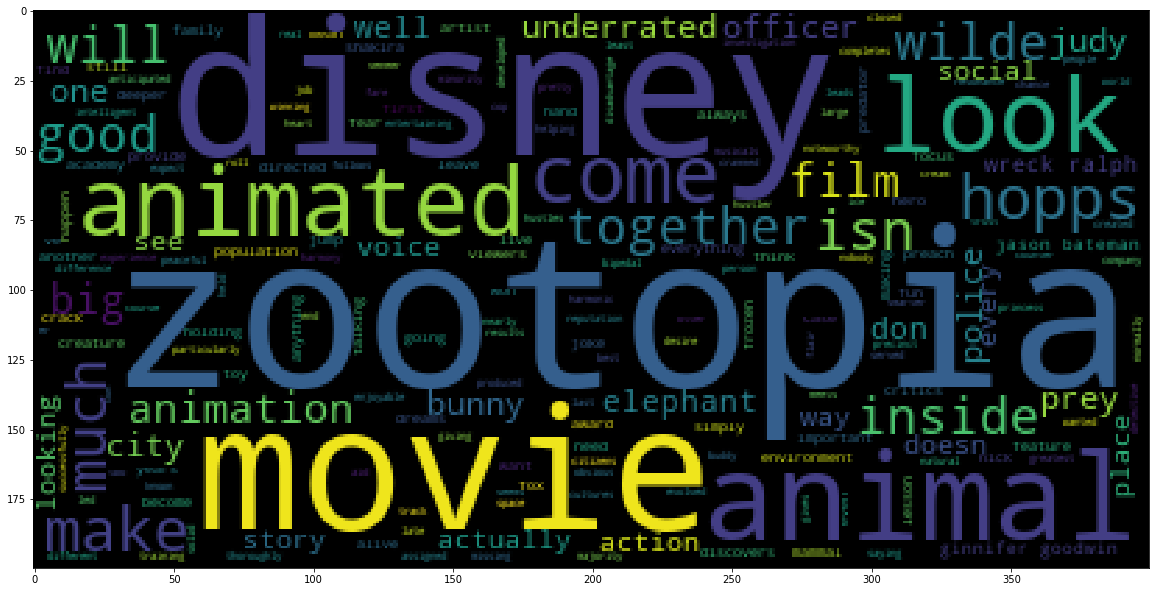

In [72]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,20))
plt.imshow(cloud)

In [73]:
len(cloud.words_)

200

# Name entity Recognition using Spacy

In [74]:
!pip install spacy


In [75]:
import spacy
from spacy import displacy

In [76]:
!python -m spacy download en_core_web_sm

✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')


In [77]:
import en_core_web_sm
nlp = en_core_web_sm.load()


In [78]:
doc=nlp(text)
for ent in doc.ents: 
    print(ent.text, ent.start_char, ent.end_char, ent.label_) 


nearly years 5 17 DATE
isn 184 187 ORG
ralph 425 430 PERSON
zootopia isn 439 451 PERSON
one 500 503 CARDINAL
judy hopps 658 668 PERSON
ginnifer goodwin 669 685 PERSON
judy 1074 1078 PERSON
nick wilde jason bateman 1085 1109 PERSON
fox 1112 1115 ORG
isn 1120 1123 PERSON
two 1373 1376 CARDINAL
one 1420 1423 CARDINAL
zootopia 1715 1723 PERSON
zootopia s 1776 1786 LOC
don 2374 2377 PERSON
us 2452 2454 GPE
don 2468 2471 PERSON
zootopia doesn 2571 2585 PERSON
one 2787 2790 CARDINAL
zootopia doesn 2945 2959 PERSON
zootopia 3181 3189 NORP
ginnifer goodwin 3981 3997 PERSON
jason bateman 4002 4015 PERSON
j k simmons idris 4038 4055 PERSON
alan tudyk 4096 4106 PERSON
zootopia 4279 4287 ORG
days 4566 4570 DATE
yesterday 4667 4676 DATE
years ago 5095 5104 DATE
zootopia 5359 5367 PERSON
mammal metropolis 5766 5783 PERSON
zootopia 5787 5795 PERSON
sahara square 5866 5879 FAC
judy hopps 6105 6115 PERSON
ginnifer goodwin 6125 6141 PERSON
first 6179 6184 ORDINAL
fox nick 6377 6385 PERSON
jason bateman 6

In [79]:
os.getcwd()

'/Users/user/Desktop/3511-CUTE5'